## Grid Search

Automated method to pick the best hyperparameters for our models. Since there are so many combinations of hyperparameters to choose, this saves us a lot of time when creating our models.

In [2]:
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression 
from sklearn.pipeline import make_pipeline

# There is no polynomial regression in sklearn. We combine PolynomialFeatures and LinearRegression
# to make a Polynomial Regression model.
# It does the PolynomialFeatures first, puts it into LinearRegression, then makes a model out of that.
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

In [3]:
def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed) #Ensures we generate the same data.
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1) 
    if err > 0:
        y += err * rng.randn(N) 
    return X, y

In [4]:
X, y = make_data(40)

In [5]:
# Ensure we have a 2D matrix.
X

array([[1.73907352e-01],
       [5.18867376e-01],
       [1.30815988e-08],
       [9.14049845e-02],
       [2.15372915e-02],
       [8.52641608e-03],
       [3.46928663e-02],
       [1.19412216e-01],
       [1.57424429e-01],
       [2.90323473e-01],
       [1.75724041e-01],
       [4.69525764e-01],
       [4.18007224e-02],
       [7.71090232e-01],
       [7.50080261e-04],
       [4.49526682e-01],
       [1.74143298e-01],
       [3.12134324e-01],
       [1.97084925e-02],
       [3.92442000e-02],
       [6.41191864e-01],
       [9.37530479e-01],
       [9.82347155e-02],
       [4.79310604e-01],
       [7.68057946e-01],
       [8.00321082e-01],
       [7.23251789e-03],
       [1.52527609e-03],
       [2.88423714e-02],
       [7.71134256e-01],
       [9.67209972e-03],
       [1.77331632e-01],
       [9.17552352e-01],
       [2.84265221e-01],
       [4.78693941e-01],
       [9.95501134e-02],
       [4.71283524e-01],
       [6.96600012e-01],
       [3.34461088e-04],
       [5.62716493e-01]])

In [9]:
# Ensure this is a 1D vector (it is, y.shape returns (40, ))
y

array([ 7.24998644,  7.70041705, -0.12288892,  3.83970623,  1.50418461,
        1.31600899,  1.88404109,  5.0456151 ,  5.42819209,  6.59281674,
        5.70193919,  8.23148858,  1.8305394 ,  9.086429  ,  1.73425177,
        8.92229631,  6.16043712,  6.68597765,  0.8992155 ,  4.51082693,
        8.70162943,  8.39917725,  5.14639037, 10.37406543,  8.96816213,
        9.50648826,  0.9746409 , -0.20201375,  1.09605993,  8.50272859,
        0.67301646,  6.98083184,  9.856233  ,  8.32873282,  8.55755817,
        5.87386864,  7.49515774,  9.997533  ,  0.54626444,  8.1929663 ])

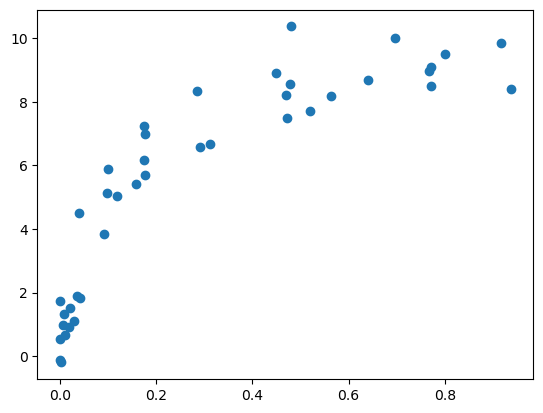

In [10]:
import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.show()

In [12]:
# We can add hyperparameters for PolynomialFeatures and LinearRegression.
# To do this, we need to use polynomialfeatures__'parametername'
# We do this and put them in a dictionary.
param_grid = {'polynomialfeatures__degree': np.arange(21),'linearregression__fit_intercept': [True, False],'linearregression__copy_X': [True, False]}

In [13]:
grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

In [14]:
# We can see the heiarchy of our model.
grid.fit(X,y)

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__copy_X': [True, False],
                         'linearregression__fit_intercept': [True, False],
                         'polynomialfeatures__degree': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])})

In [16]:
# Out of all of our parameters, which ones are the best parameters?
grid.best_params_

{'linearregression__copy_X': True,
 'linearregression__fit_intercept': False,
 'polynomialfeatures__degree': 4}